# Capstone 1 EDA

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import spatial
import capstone1_funcs as cs1
import seaborn as sns
%matplotlib inline

## Import CSV

In [134]:
df = pd.read_csv('/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/music2/SpotifyAudioFeaturesApril2019.csv')

In [135]:
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [136]:
df.shape

(130663, 17)

## If there are any duplicate songs, they need to be removed

In [137]:
cs1.drop_duplicates(df)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


## The format of duration_ms is a bit hard to read.  Passing DF through a ms to second converter

In [138]:
cs1.time_ms_to_sec(df)

### There is now a new time_seconds column which is easier to interpret

In [139]:
df.head()

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238,0.005820,0.743,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),214,0.024400,0.846,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,138,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,125,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,124,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [140]:
df.shape

(130663, 17)

## Check the data for any NaN values

In [141]:
cols_list = ['track_id', 'track_name', 'time_seconds', 'acousticness', 'danceability', 
             'energy', 'instrumentalness', 'key', 'liveness', 
             'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 
             'valence', 'popularity']

In [142]:
cs1.check_for_nans(df, cols_list)

NaNs in track_id: 0
NaNs in track_name: 0
NaNs in time_seconds: 0
NaNs in acousticness: 0
NaNs in danceability: 0
NaNs in energy: 0
NaNs in instrumentalness: 0
NaNs in key: 0
NaNs in liveness: 0
NaNs in loudness: 0
NaNs in mode: 0
NaNs in speechiness: 0
NaNs in tempo: 0
NaNs in time_signature: 0
NaNs in valence: 0
NaNs in popularity: 0


## Gain a general understanding of the data and how it's distributed

In [143]:
attribute_list = ['time_seconds', 'acousticness', 'danceability', 'energy', 
                  'instrumentalness', 'liveness', 'loudness', 'mode', 
                  'speechiness', 'tempo', 'time_signature', 'valence']

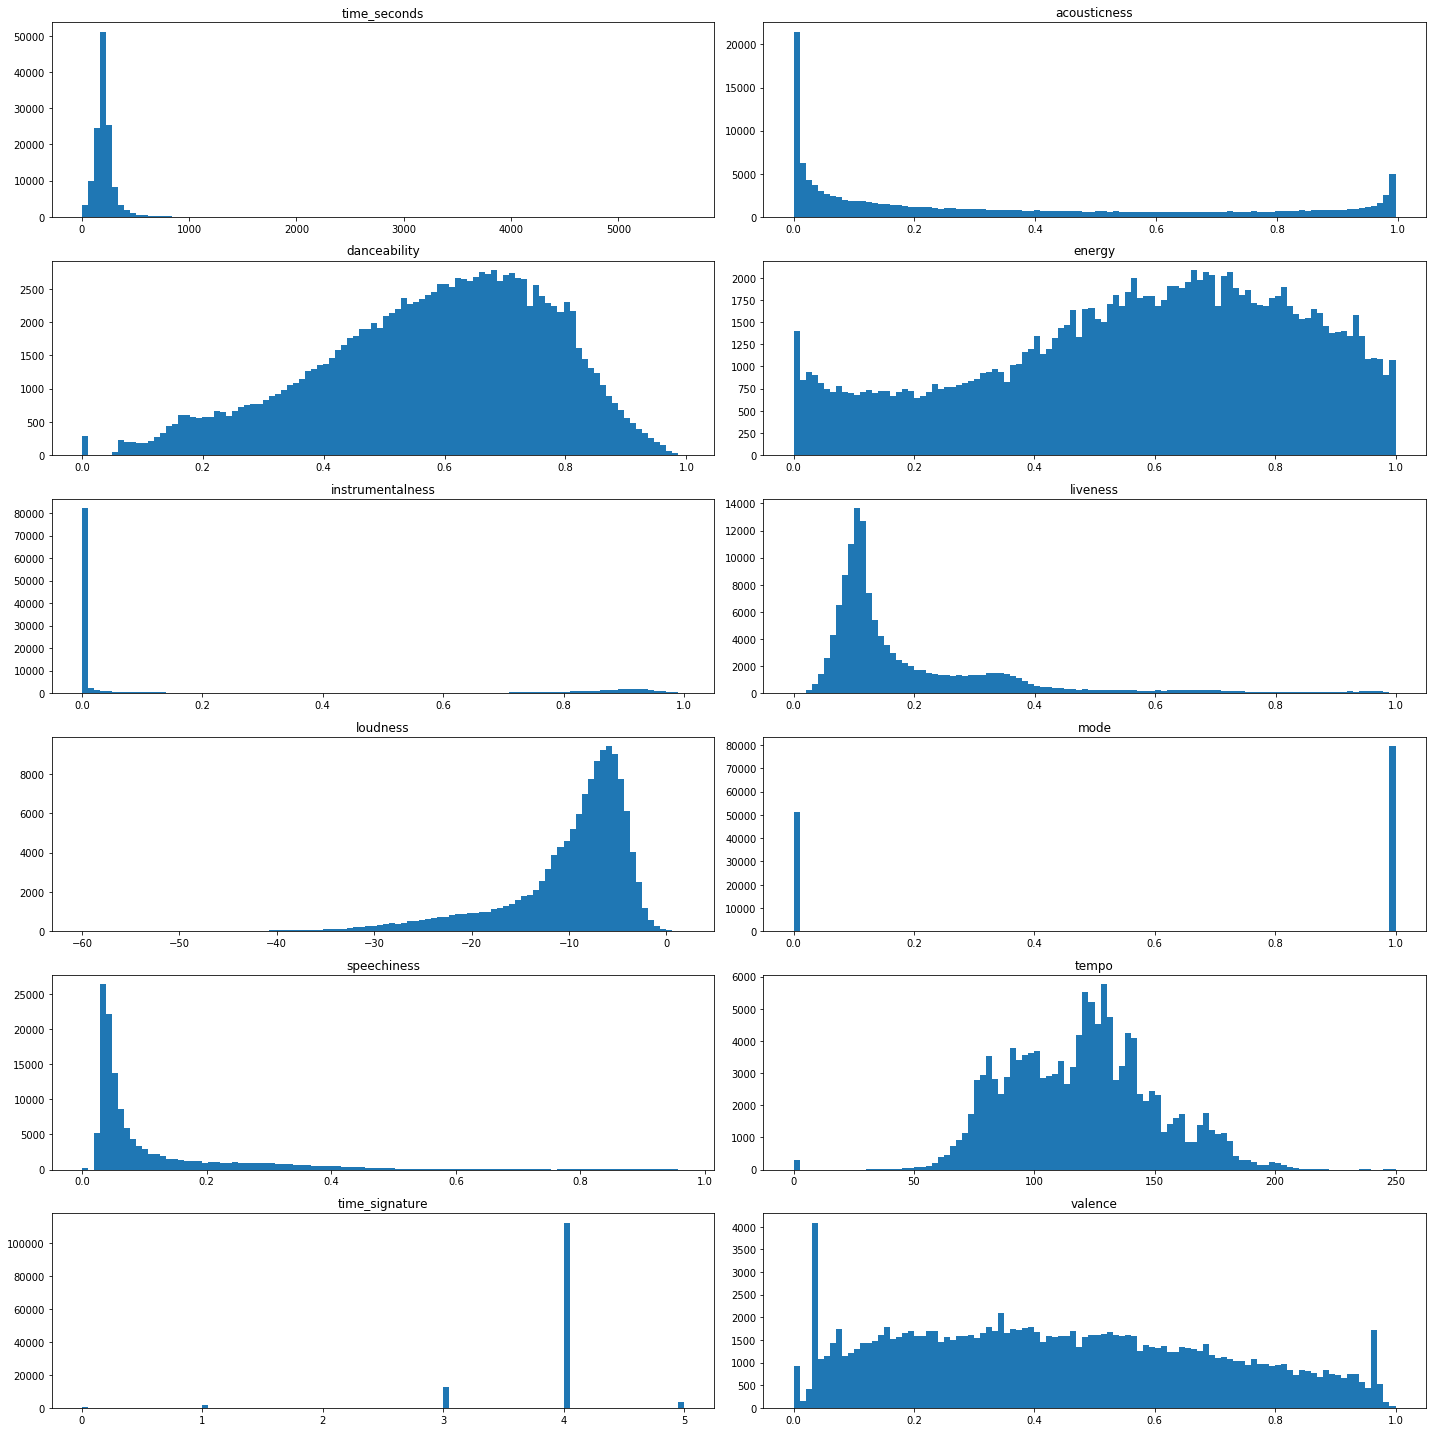

In [16]:
fig, axs = plt.subplots(6,2, figsize=(20,20))

for col, ax in zip(df[attribute_list].columns, axs.flatten()):
    ax.hist(df[col], bins=100)
    ax.set_title(col)

# for ax, col in zip(axs.flat(), attribute_list):
#     df[col].hist(ax=ax, bins=125)
#     ax.set_title(col)

fig.tight_layout()

## I wanted to examine the relationship between each attribute through the use of a scatter matrix

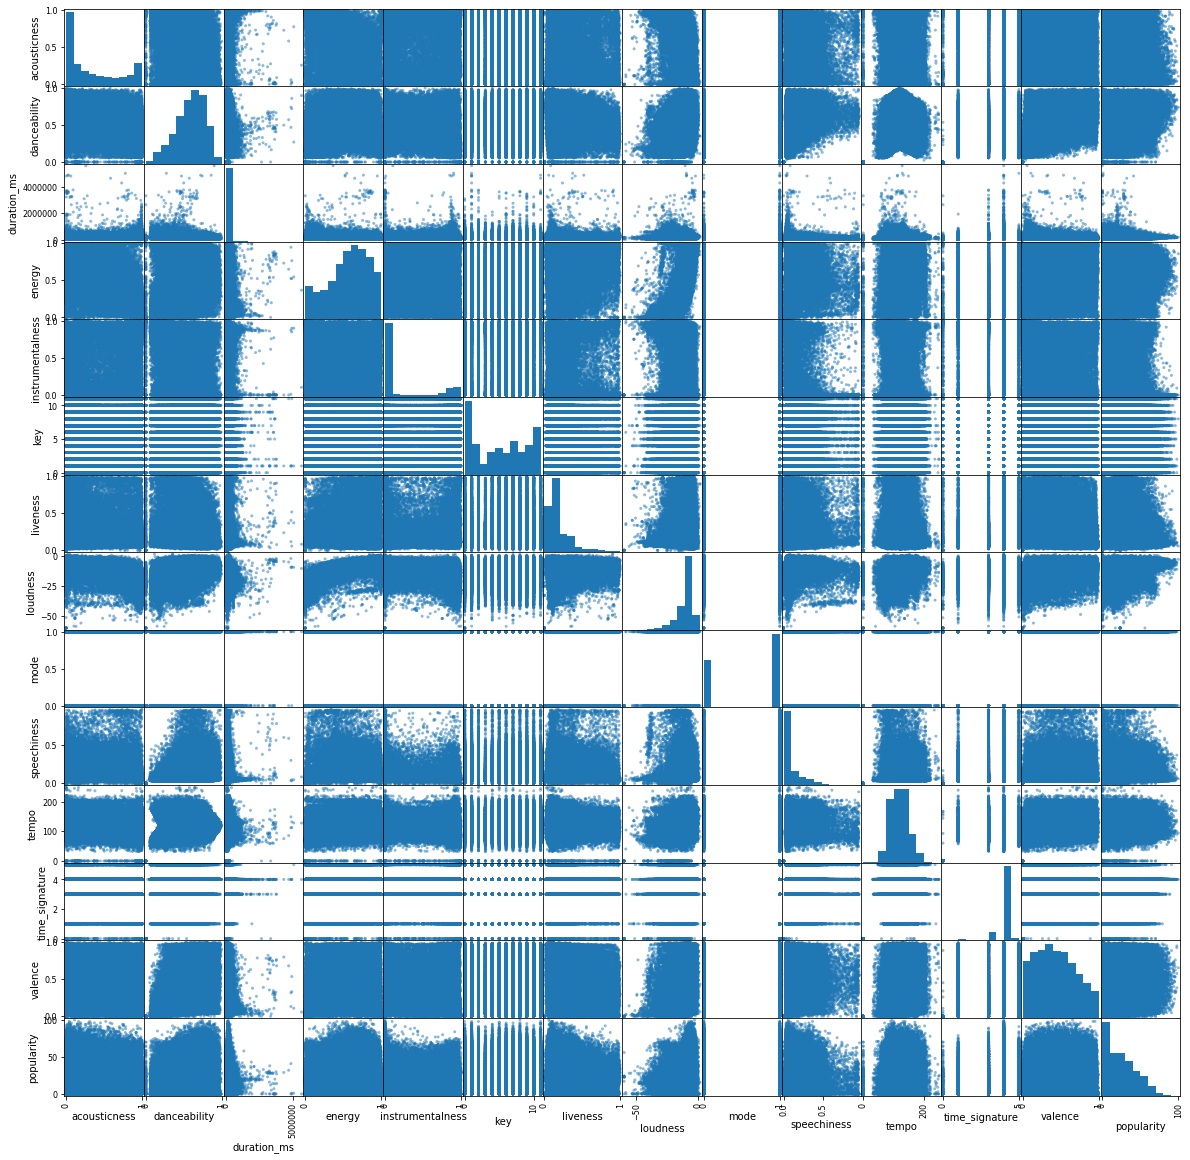

In [43]:
df_scat_matrix = pd.plotting.scatter_matrix(df, figsize=(20, 20))

## Group together songs by similar popularity rating.  Find the top songs.  Bin together groups of popularity. 10 groups of popularity, all roughly the same sample size

### The songs were grouped into 10 groups.  

Out of the 130663 total songs in the dataframe, I decided that the top 0.1% of these would work as their own dataframe.  The remaining songs were distrubuted between the remaining 10 groups.

In [144]:
popularity = df.copy().sort_values('popularity', ascending=False)

In [145]:
popularity.head()

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
99393,Daddy Yankee,5w9c2J52mkdntKOmRLeM2m,Con Calma,193,0.1100,0.737,0.860,0.000002,8,0.0574,-2.652,0,0.0593,93.989,4,0.656,100
99364,Post Malone,6MWtB6iiXyIwun0YzU6DFP,Wow.,149,0.1630,0.833,0.539,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.385,98
99368,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m,bad guy,194,0.3080,0.708,0.418,0.093000,0,0.1000,-10.998,1,0.3680,131.926,4,0.578,98
123909,Post Malone,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,158,0.5200,0.744,0.494,0.000000,2,0.0716,-5.563,1,0.0699,89.972,4,0.927,98
99366,Jonas Brothers,4y3OI86AEP6PQoDE6olYhO,Sucker,181,0.0427,0.842,0.734,0.000000,1,0.1060,-5.065,0,0.0588,137.958,4,0.952,98


In [146]:
df.shape

(130663, 17)

Plot all attributes against popularity

In [418]:
# fig, ax = plt.subplots(13, figsize = (20, 20))

# for i in range(len(attribute_list)):
# #     ax = fig.add_subplot(4, 3, i)
#     x = df['popularity']
#     y = df[attribute_list[i]]
#     ax[i].scatter(x, y)
# #     ax[i].set_xlabel('popularity')
# #     ax.set_ylabel(attribute_list[i])
# #     ax.set_title(str(attribute_list[i]) + ' ' + 'vs popularity')


## Create masks to separate popularity into new dfs.  Separated as follows:
- Greater than 86
- Between 52 and 87
- Between 41 and 52
- Between 33 and 41
- Between 26 and 33
- Between 20 and 26
- Between 14 and 20
- Between 7 and 14
- Between 1 and 7
- Between 0 and 1

Besides the greater than 87 group, each group holds around 13,000 songs now.  This will make it easier to analyze later.

### Create masks for each new group

In [147]:
mask_86 = popularity['popularity'] > 86
mask_52 = (popularity['popularity'] > 52) & (popularity['popularity'] <= 86)
mask_41 = (popularity['popularity'] > 41) & (popularity['popularity'] <= 52)
mask_33 = (popularity['popularity'] > 33) & (popularity['popularity'] <= 41)
mask_26 = (popularity['popularity'] > 26) & (popularity['popularity'] <= 33)
mask_20 = (popularity['popularity'] > 20) & (popularity['popularity'] <= 26)
mask_14 = (popularity['popularity'] > 14) & (popularity['popularity'] <= 20)
mask_7 = (popularity['popularity'] > 7) & (popularity['popularity'] <= 14)
mask_1 = (popularity['popularity'] > 1) & (popularity['popularity'] <= 7)
mask_0 = popularity['popularity'] <= 1

In [148]:
df.shape

(130663, 17)

### Apply masks to create new dataframes to work with

In [149]:
df_86 = popularity[mask_86]
df_52 = popularity[mask_52]
df_41 = popularity[mask_41]
df_33 = popularity[mask_33]
df_26 = popularity[mask_26]
df_20 = popularity[mask_20]
df_14 = popularity[mask_14]
df_7 = popularity[mask_7]
df_1 = popularity[mask_1]
df_0 = popularity[mask_0]

In [150]:
df.shape

(130663, 17)

### mask_86 is about 0.11% of the total data

In [151]:
f'{round(((len(df_86) / len(df)) * 100), 3)} %'

'0.106 %'

### New dataframe totals and percents of total data

In [152]:
df_lst = [df_86, df_52, df_41, df_33, df_26, df_20, df_14, df_7, df_1, df_0]
df_name_lst = ['df_86', 'df_52', 'df_41', 'df_33', 'df_26', 'df_20', 'df_14', 'df_7', 'df_1', 'df_0']

for df_, name in zip(df_lst, df_name_lst):
    print(f'{name}: \t Songs:{df_.shape[0]} \n\t Percent:{round((len(df_) / 130663)*100, 2)}%\n')

df_86: 	 Songs:138 
	 Percent:0.11%

df_52: 	 Songs:13680 
	 Percent:10.47%

df_41: 	 Songs:13267 
	 Percent:10.15%

df_33: 	 Songs:12794 
	 Percent:9.79%

df_26: 	 Songs:14363 
	 Percent:10.99%

df_20: 	 Songs:13562 
	 Percent:10.38%

df_14: 	 Songs:14268 
	 Percent:10.92%

df_7: 	 Songs:14447 
	 Percent:11.06%

df_1: 	 Songs:12038 
	 Percent:9.21%

df_0: 	 Songs:22106 
	 Percent:16.92%



## The attribute that drew my attention first was loudness.

### I am curious how loudness relates to a track's popularity

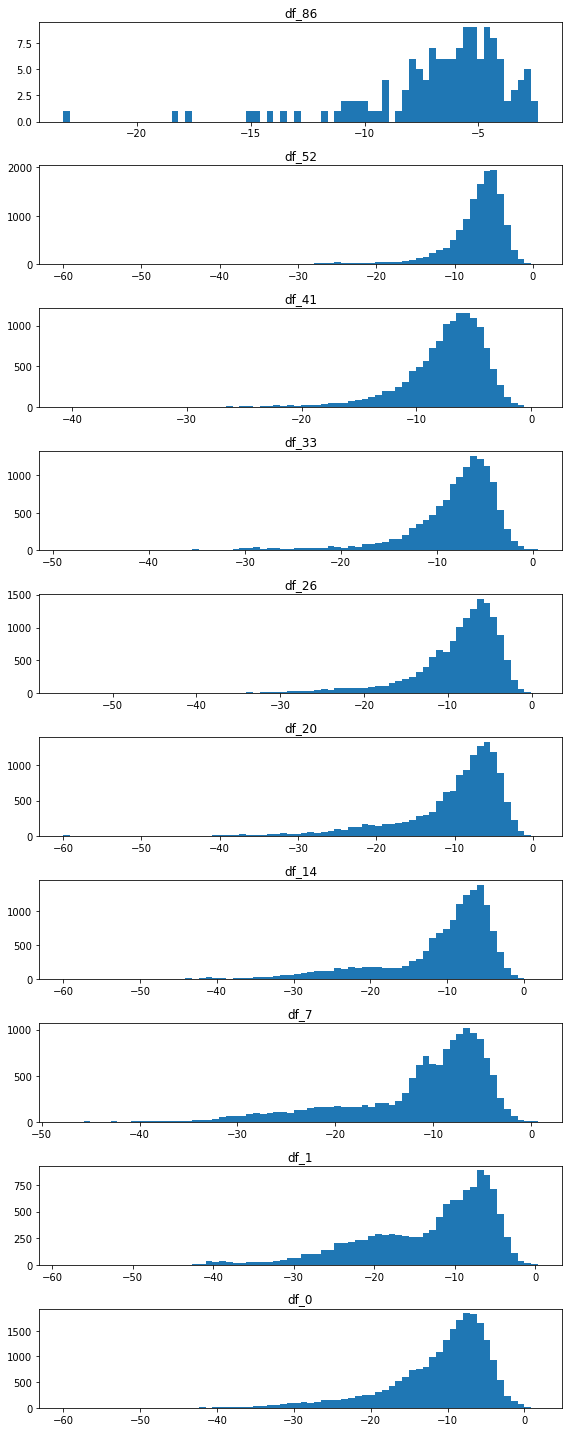

In [153]:
df_lst = [df_86, df_52, df_41, df_33, df_26, df_20, df_14, df_7, df_1, df_0]
df_name_lst = ['df_86', 'df_52', 'df_41', 'df_33', 'df_26', 'df_20', 'df_14', 'df_7', 'df_1', 'df_0']

fig, axs = plt.subplots(10, figsize = (8,20))
def plot_hist(axs, dfs, names, col):
    for ax, df_, name in zip(axs, dfs, names):
        ax.hist(df_[col], bins=70)
        ax.set_title(name)
    fig.tight_layout()

plot_hist(axs, df_lst, df_name_lst, 'loudness')

In [170]:
df.shape

(130663, 17)

In [172]:
full_data_mean = np.mean(df['loudness'])
full_data_std = np.std(df['loudness'])
print(f'df Avg Loudness: {full_data_mean} STD: {full_data_std}\n')

for df_, name in zip(df_lst, df_name_lst):
    avg_loudness = round(np.mean(df_['loudness']), 3)
    stdev = np.std(df_['loudness'])
    length = len(df_['loudness'])
    print(f'{name} Avg Loudness: {avg_loudness} STD: {stdev} Sample Size: {length}')   

df Avg Loudness: -9.974005571584964 STD: 6.5443539941211775

df_86 Avg Loudness: -6.667 STD: 3.2180620435457827 Sample Size: 138
df_52 Avg Loudness: -7.492 STD: 4.419324981950884 Sample Size: 13680
df_41 Avg Loudness: -7.679 STD: 4.1458640633368775 Sample Size: 13267
df_33 Avg Loudness: -8.35 STD: 5.079570215145395 Sample Size: 12794
df_26 Avg Loudness: -8.951 STD: 5.5097261395986985 Sample Size: 14363
df_20 Avg Loudness: -10.34 STD: 6.915598804816538 Sample Size: 13562
df_14 Avg Loudness: -10.936 STD: 7.398791609895609 Sample Size: 14268
df_7 Avg Loudness: -11.369 STD: 7.2845876111424905 Sample Size: 14447
df_1 Avg Loudness: -13.097 STD: 7.937555619497009 Sample Size: 12038
df_0 Avg Loudness: -11.054 STD: 6.684811845817827 Sample Size: 22106


In [124]:
# fig, axs = plt.subplots(10, figsize = (7,20))
# def plot_scatter(axs, x_vals, y_vals, dfs, names):
#     for ax, df, name in zip(axs, dfs, names):
#         ax.scatter(df[x_vals], df[y_vals])
# #         ax.set_title(name)
#     fig.tight_layout()



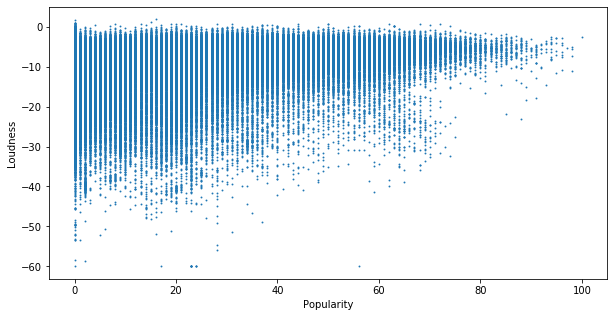

In [173]:
plt.figure(figsize=(10, 5))
# for df in df_lst:
plt.scatter(df['popularity'], df['loudness'], s=0.8)
plt.xlabel('Popularity')
plt.ylabel('Loudness');